# Titanic: Machine Learning from Disaster

![title](Titanic.jpg)

## 1. Importing libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Machine learning

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
# Collecting data

# The train data set will be used to train our model 
# We will test our model with the test data set
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Check out our data...

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_data.shape,test_data.shape)

(891, 12) (418, 11)


In [6]:
#train_data.info()
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can see that in the train_data data set we have 891 passengers in total, whereas in the test_data one we only have 491. 

From the cells above, we can see that we are missing some data in both data sets. Particularly data sepecifying passenger age, cabin, fare and place where he/she embarked. 
In the future we will look at ways as to how we might fill this missing data in the best way rergarding predictions. 

## 2. Some Data visualization

The following graphs will help us decide which information is relevant from a survival point of view for each of the passengers.

This is important, since later on, when constructing our model, we will need to "train" it based on these features. The more relevant they are the more accurate out model´s predictions will be. 

In [8]:
def bar_chart(feature):
    survived = train_data[train_data["Survived"]==1][feature].value_counts()
    dead = train_data[train_data["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind = "bar",stacked = True,figsize = (10,5),title = feature)

## 2.1 Sex

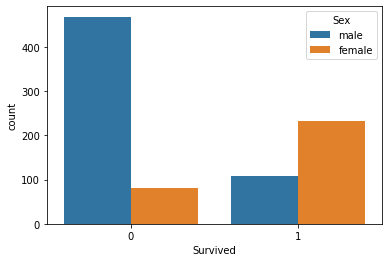

In [9]:
sns.countplot(x="Survived",data=train_data,hue="Sex")

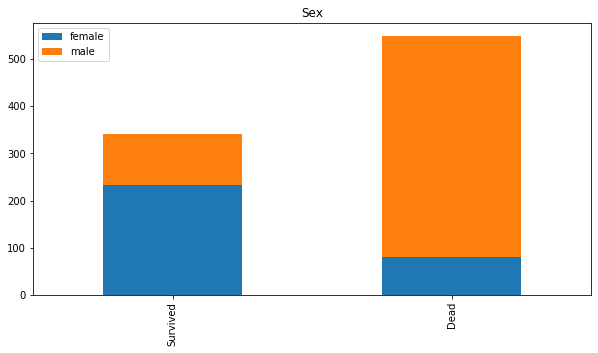

In [10]:
bar_chart("Sex")

We can clearly see that most of the dead were men. This will be an important feature to take into account when building our model. 

## 2.2 Passenger Class

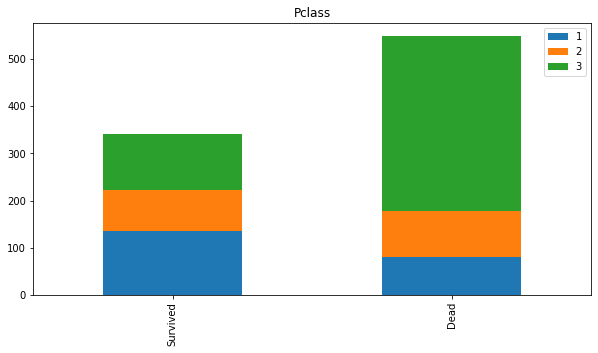

In [11]:
bar_chart("Pclass")

The majority od the dead passengers where from third class

## 2.3 Sinblings or spouses aboard

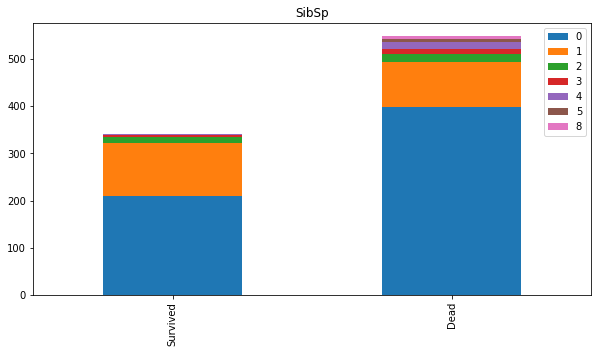

In [12]:
bar_chart("SibSp")

This refers to the number of siblings / spouses each passenger was travelling with. We can see that most of them were travelling alone, whereas some other where accompanied by up to eight siblings. This feature doesn´t seem to have a clear impact on the survival  odds of a given passsenger, tehrefore, it will not be a decisive feature for our model, nevertheless, it will be taken into account. 

## 2.4 Parents or children aboard

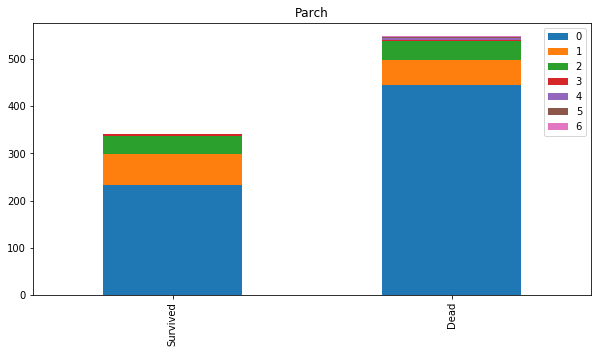

In [13]:
bar_chart("Parch")

Numer of parents / children aboard the ship.

## 3. Preparing the Train Data

Here we will analyse the data to see what information we are missing and how we can fill this missing information. We will do this for the train data and the test data as well. 

In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.1 Sex

In [16]:
# Sex
# We need to transform words (male / female) into numbers so that computer understands
# We could have used the function pandas.get_dummies
train_data.loc[train_data["Sex"] == "male","Sex"] = 1
train_data.loc[train_data["Sex"] == "female","Sex"] = 0

### 3.2 Embarked

In [17]:
# Embarked
# We are missing 2 values, we will fill them with "S" because it is the most common
# As we did before, we will turn letters into numbers so that the model can work with them
#print(train_data["Embarked"].count())
#print(train_data["Embarked"].unique())
#print(train_data["Embarked"].value_counts())

train_data["Embarked"] = train_data["Embarked"].fillna("S")
train_data.loc[train_data["Embarked"] == "S","Embarked"] = 0
train_data.loc[train_data["Embarked"] == "C","Embarked"] = 1
train_data.loc[train_data["Embarked"] == "Q","Embarked"] = 2

### 3.3 Age

In [18]:
# Age: Fill the missing
# We will use the mean age to fill in the missing age values

train_data["Age"] = train_data["Age"].fillna(round(train_data["Age"].mean()))

### 3.4 Cabin

#### 3.4.1 Analysing the existing data

In [19]:
train_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F2             3
              ..
C82            1
C70            1
E63            1
A32            1
D7             1
Name: Cabin, Length: 147, dtype: int64

In [20]:
# Cabin numbers that we are missing
train_data["Cabin"].isnull().sum(),test_data["Cabin"].isnull().sum()

(687, 327)

The number of the cabin is formed by a letter a some numbers that go from A to G.

From the following image we can see that the first letters corresponded to the top decks, probably the firs and second class decks, and as we go down below decks the letters go from A to G.

We can easily deduce that passengers travelling in cabins beginning with the letter "A" had a much higher chance of survival than passengers travelling in cabins starting with "G".

To add this to the model we will need to extract the letter of each cabin, assign a number to it and fill the missing data. We can fill the missing data taking into account factors like Passenger Class, Fare, or Title, to give us a better idea of where the passenger in question could have been travelling. 

![](Titanic_decks.png)

In [21]:
# We will start with the train data

# We can see that most of the passengers from first class have a cabin number, whereas the third class ones don´t.

train_data_cabin_null = train_data[train_data["Cabin"].isna()][["Pclass","Cabin","Fare"]]
train_data_cabin_not_null = train_data[train_data["Cabin"].notna()][["Pclass","Cabin","Fare"]]

train_data_cabin_null

train_data_cabin_null["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

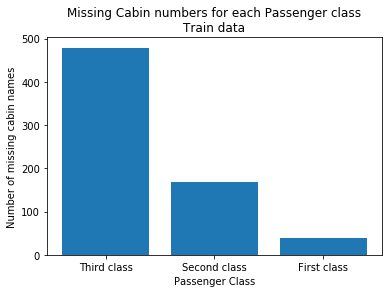

In [22]:
x = ["Third class","Second class","First class"]
y = list(train_data_cabin_null["Pclass"].value_counts())
plt.title("Missing Cabin numbers for each Passenger class\nTrain data")
plt.xlabel("Passenger Class")
plt.ylabel("Number of missing cabin names")

plt.bar(x,y)

In [23]:
#train_data[train_data["Pclass"]==1][["Pclass","Cabin","Fare"]].head(10)

In [24]:
# Dataframe with passengers that have a cabin number

train_data_cabin_not_null.head(10)

,Pclass,Cabin,Fare
1,1,C85,71.2833
3,1,C123,53.1000
6,1,E46,51.8625
10,3,G6,16.7000
11,1,C103,26.5500
21,2,D56,13.0000
23,1,A6,35.5000
27,1,C23 C25 C27,263.0000
31,1,B78,146.5208
52,1,D33,76.7292


In [25]:
def get_number_of_cabins(string):
    number_of_cabins = 1
    for i in string:
        if i == " ":
            number_of_cabins += 1
            
    return number_of_cabins

def first_letter(string):
    return string[0]

In [26]:
# I´m only interested in the first letter to know the deck
# Some fares correspond to more than one cabin
# Find out fare per cabin 

train_data_cabin_not_null["No_cabins"] = 1 # Fill with 1 at the begining
train_data_cabin_not_null["Deck"] = "A"

# Deck letters

for row in train_data_cabin_not_null.index:
    train_data_cabin_not_null["No_cabins"][row] = get_number_of_cabins(train_data_cabin_not_null["Cabin"][row])
    train_data_cabin_not_null["Deck"][row] = first_letter(train_data_cabin_not_null["Cabin"][row])

# Mean price per cabin
    
train_data_cabin_not_null["Price_per_cabin"] = train_data_cabin_not_null["Fare"] / train_data_cabin_not_null["No_cabins"]

train_data_cabin_not_null

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Pclass,Cabin,Fare,No_cabins,Deck,Price_per_cabin
1,1,C85,71.2833,1,C,71.283300
3,1,C123,53.1000,1,C,53.100000
6,1,E46,51.8625,1,E,51.862500
10,3,G6,16.7000,1,G,16.700000
11,1,C103,26.5500,1,C,26.550000
...,...,...,...,...,...,...
871,1,D35,52.5542,1,D,52.554200
872,1,B51 B53 B55,5.0000,3,B,1.666667
879,1,C50,83.1583,1,C,83.158300
887,1,B42,30.0000,1,B,30.000000


Now we can get an idea of how much a cabin costs depending on the deck where its at.

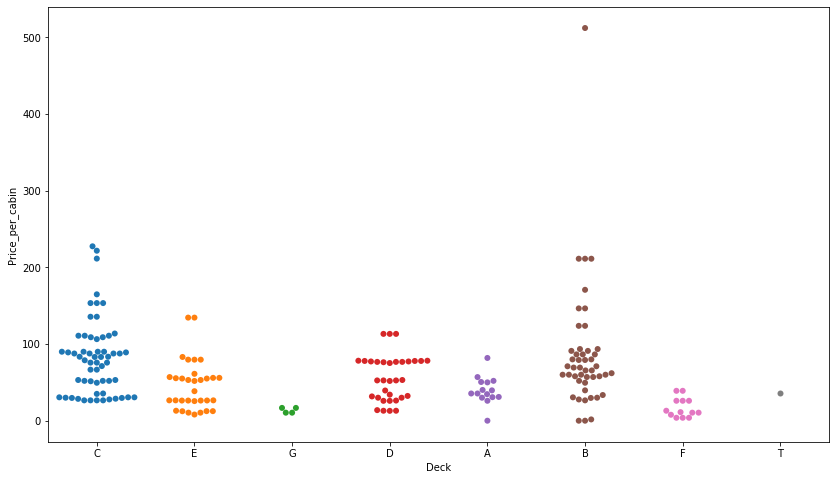

In [27]:
plt.figure(figsize=(14,8))

sns.swarmplot(x="Deck",y="Price_per_cabin",data=train_data_cabin_not_null,size=6)

In [28]:
train_data_cabin_not_null["Deck"].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [29]:
for pclass in [1,2,3]:
    decks = train_data_cabin_not_null[train_data_cabin_not_null["Pclass"]==pclass]["Deck"].unique()
    print(f"Passenger class: {pclass}\tDecks: {decks}")

Passenger class: 1	Decks: ['C' 'E' 'A' 'B' 'D' 'T']
Passenger class: 2	Decks: ['D' 'F' 'E']
Passenger class: 3	Decks: ['G' 'F' 'E']


Based on the data, we can see that passenfers from first class could travel in decks A,B,C,D,E and T, passengers in second class could travel in decks D,E or F and finally, passengers from third class travelled in decks E,F or G.

In [30]:
for deck in ["A","B","C","D","E","F","G","T"]:
    mean = train_data_cabin_not_null[train_data_cabin_not_null["Deck"] == deck]["Price_per_cabin"].mean()
    print(f"Mean price per cabin for in Deck: {deck} is {round(mean,3)}")

Mean price per cabin for in Deck: A is 39.624
Mean price per cabin for in Deck: B is 86.579
Mean price per cabin for in Deck: C is 82.483
Mean price per cabin for in Deck: D is 56.285
Mean price per cabin for in Deck: E is 46.027
Mean price per cabin for in Deck: F is 16.954
Mean price per cabin for in Deck: G is 13.581
Mean price per cabin for in Deck: T is 35.5


The graph is not very defining. So we obtain the mean price per cabin on each of the decks. And we see that surprisingly the highest average corresponds to cabins in deck "B" (not "A", as I expected at first).

This data will serve to fill in the deks for the missing cabins based on the fare cost. We will assume, as a starting point, that all the missing cabins correspond to one cabin per passenger.

#### 3.4.2 Conclusions 

Let's recap...
1. We have 8 possible decks: A,B,C,D,E,F,G and T.
2. We have analysed the relationship between passenger class and deck where they travelled.
3. We have also analysed the relationship between the fare of the ticket and the deck where the passenger travelled, this is not very defining. 
4. Finally we have obtained the average fare per number of cabins for each passenger. This is due to the fact that there are several fares that correspond to more than one cabin. 

To fill the missing data we will take into account tha fare and the passenger class in order to obtain the deck where the passenger could have been travelling.

#### 3.4.3 How to fill the missing data

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [32]:
# Dictionaries

dict_pclass_deck = {
    1:["A","B","C","D","E","T"],
    2:["D","E","F"],
    3:["E","F","G"]
}

dict_fare_deck = {
    "A": 39.624,
    "B": 86.579,
    "C": 82.483,
    "D": 53.285,
    "E": 46.027,
    "F": 16.954,
    "G": 13.581,
    "T": 35.5
}

In [33]:
def get_deck(dict_fare,dict_pclass, fare, pclass):
    listOfItems = dict_fare.items()
    for item  in listOfItems:
        if item[1] == fare:
            deck = item[0]
            return deck

    # We haven´t found the exact value
    difference = list()
    difference_decks = list()
    for item  in listOfItems:
        #print(item[0],abs(valueToFind - item[1]))
        difference.append(abs(fare - item[1]))
        difference_decks.append(item[0])
        
    # Find index of minimum and correspond it to list of decks
    
    minimum_index = difference.index(min(difference))
    possible_deck = difference_decks[minimum_index]
    
    # We have the most probable deck based on the fare
    # Make sure this is possible regarding passenger class
    
    if possible_deck in dict_pclass.get(pclass):
        deck = possible_deck
        
        return deck
    
    else:
        #print(f"Suggest deck: {possible_deck}. But there is no {possible_deck} deck in pclass {pclass}")
        # Two options:
            # 1. Fare to high for class --> Best deck in class
            # 2. Class to high for fare --> Worst deck in class
            
        if fare > dict_fare.get(possible_deck): # Opt. 1
            
            return dict_pclass.get(pclass)[0] # Best deck of its class
        
        else:
            
            return dict_pclass.get(pclass)[-1] # Worst deck of its class
        


#### 3.4.4 Filling the missing data

We have built a function that takes the fare and the passenger class and returns the most probable deck in which the passenger migth have travelled. We now need to fill the data frame(s) using this function.

We will later need to give numerical values to each of the decks so that the model can understand them.

In [34]:
train_data["Deck"] = "A"  # Fill with "A" provisionally

# Deck letters

train_data["Cabin"] = train_data["Cabin"].fillna("Z") # Fill missing with "Z" provisionally

# To fill column Deck:
# If cabin != "Z" appply function of getting first letter
# If cabin == "Z" apply get_deck function

for row in train_data.index:
    if train_data["Cabin"][row] != "Z":
        train_data["Deck"][row] = first_letter(train_data["Cabin"][row])
    else:
        fare = train_data["Fare"][row]
        pclass = train_data["Pclass"][row]
        train_data["Deck"][row] = get_deck(dict_fare_deck,dict_pclass_deck,fare,pclass)

train_data

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,0,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,0,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Z,0,F
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,Z,0,F
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,C


In [35]:
# Turn deck into numeric values

dict_deck_number = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7,
    "T": 8
}

def get_deck_no(data_set):
    data_set['Deck_no'] = data_set.Deck.map(dict_deck_number)
    return data_set

In [36]:
train_data = get_deck_no(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,0,G,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,0,G,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,C,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,0,G,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Z,0,F,6
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,B,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,Z,0,F,6
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,C,3


In [37]:
# We now repeat the process with the test data

# 1. Filling the missing values
    
test_data["Deck"] = "A"  # Fill with "A" provisionally

# Deck letters

test_data["Cabin"] = test_data["Cabin"].fillna("Z") # Fill missing with "Z" provisionally

# To fill column Deck:
# If cabin != "Z" appply function of getting first letter
# If cabin == "Z" apply get_deck function

for row in test_data.index:
    if test_data["Cabin"][row] != "Z":
        test_data["Deck"][row] = first_letter(test_data["Cabin"][row])
    else:
        fare = test_data["Fare"][row]
        pclass = test_data["Pclass"][row]
        test_data["Deck"][row] = get_deck(dict_fare_deck,dict_pclass_deck,fare,pclass)

# 2. Turn deck into numeric values

test_data = get_deck_no(test_data)

test_data

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Z,Q,G,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Z,S,G,7
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Z,Q,F,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Z,S,G,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Z,S,G,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Z,S,G,7
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Z,S,G,7
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Z,S,G,7


### 3.5 Name

This is a tricky one... the title of the passenger can reveal social status related inforamtion about him or her. If we notice, every passenger has a title, and this is preceded by a "," and followed by a ".".

We are not not going to give a numeric value to each of the different titles. We are going to define four "social groups" based on their title. This could be more precise, however there probably wouln´t be a considerable difference, so we will continue with this approach.

Bellow we can see in which of the four social groups we insert each of the titles. These groups will go from 0 to 3 (this doesn't respond to any sort of ranking).

In [38]:
titles = []
for i in train_data["Name"]:
    titles.append(i.split(",")[1].split(".")[0].strip())
    
# print(set(titles))

Title_dict = {
    "Capt": 3,
    "Col": 3,
    "Major": 3,
    "Jonkheer": 3,
    "Don": 3,
    "Sir" : 3,
    "Dr": 3,
    "Rev": 3,
    "the Countess":3,
    "Mme": 3,
    "Mlle": 3,
    "Ms": 3,
    "Mr" : 0,
    "Mrs" : 2,
    "Miss" : 1,
    "Master" : 3,
    "Lady" : 3
}

print(Title_dict)

# The titles need to be numbered so that the model can process them

{'Capt': 3, 'Col': 3, 'Major': 3, 'Jonkheer': 3, 'Don': 3, 'Sir': 3, 'Dr': 3, 'Rev': 3, 'the Countess': 3, 'Mme': 3, 'Mlle': 3, 'Ms': 3, 'Mr': 0, 'Mrs': 2, 'Miss': 1, 'Master': 3, 'Lady': 3}


In [39]:
# Add new column to data set with titles

def get_titles(data_set):
    # we extract the title from each name
    data_set['Title'] = data_set['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    data_set['Title'] = data_set.Title.map(Title_dict)
    return data_set

In [40]:
# Train data
train_data = get_titles(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,0,G,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,0,G,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,C,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,0,G,7,0


In [41]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Deck_no        0
Title          0
dtype: int64

All the train data has been filled!

## 4. Preparing the Test Data

Let's see what data we're missing...

In [42]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Deck            0
Deck_no         0
dtype: int64

In [43]:
# We will do the same for the test data as we did before for the train data

test_data.loc[test_data["Sex"] == "male","Sex"] = 1
test_data.loc[test_data["Sex"] == "female","Sex"] = 0
test_data["Embarked"] = test_data["Embarked"].fillna("S")
test_data.loc[test_data["Embarked"] == "S","Embarked"] = 0
test_data.loc[test_data["Embarked"] == "C","Embarked"] = 1
test_data.loc[test_data["Embarked"] == "Q","Embarked"] = 2
test_data["Age"] = test_data["Age"].fillna(round(test_data["Age"].mean()))
test_data["Fare"] = test_data["Fare"].fillna(round(train_data["Fare"].mean()))
# Title information see bellow

# We filled in the missing fare value with the mean from the train data where we have all values

In [44]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Z,2,G,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Z,0,G,7
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Z,2,F,6
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Z,0,G,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Z,0,G,7


Title information...

In [45]:
# Fill all the titles we can using the functions we created earlier
test_data = get_titles(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Z,2,G,7,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Z,0,G,7,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Z,2,F,6,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Z,0,G,7,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Z,0,G,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,Z,0,G,7,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1,C,3,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Z,0,G,7,0.0
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,Z,0,G,7,0.0


In [46]:
# We need to fill in the missing Title value

print("Number of titles in the test data:")
print(test_data["Title"].value_counts())
print("")
name = str(test_data[test_data["Title"].isna()]["Name"])
print(f"The missing title corresponds to: {name}")
test_data[test_data["Title"].isna()]

Number of titles in the test data:
0.0    240
1.0     78
2.0     72
3.0     27
Name: Title, dtype: int64

The missing title corresponds to: 414    Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9,C105,1,C,3,NaN


In [47]:
# How should we fill the missing Title?

test_data["Title"].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: Title, dtype: int64

In [48]:
# We will fill the missing Title value with the no. 1, since the missing passenger is a female travelling alone (Miss.)

test_data["Title"] = test_data["Title"].fillna(1)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Z,2,G,7,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Z,0,G,7,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Z,2,F,6,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Z,0,G,7,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Z,0,G,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,Z,0,G,7,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1,C,3,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Z,0,G,7,0.0
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,Z,0,G,7,0.0


Let´s double check all the data has been filled in.

In [49]:
print(train_data.isnull().sum())
print("")
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Deck_no        0
Title          0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Deck_no        0
Title          0
dtype: int64


All the data has been filled. We are good to go!

In [50]:
#train_data.drop("Name",axis=1,inplace=True)
#test_data.drop("Name",axis=1,inplace=True)

## 5. Machine learning model

Here we will use all the information we have (our model has) learned about the passengers in order to, through various the desision making procedures, we will try to predict wether a passenger will survive or not.  

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,0,G,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,0,G,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,C,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,0,G,7,0


### 5.1 Feature selection

We will now select the features (X) for our model. These features will help our model identify patterns. The features will be columns.

"When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential."

In [52]:
titanic_features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Title","Embarked","Deck_no"]

# Adding Embarked as feature does not improve our model

X_train = train_data[titanic_features]
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Title,Deck_no
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.758889,0.523008,0.381594,32.204208,0.710438,5.721661
std,0.836071,13.002570,1.102743,0.806057,49.693429,0.968778,1.713454
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,5.000000
50%,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,6.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,7.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,8.000000


In [53]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked,Deck_no
0,3,1,22.0,1,0,7.2500,0,0,7
1,1,0,38.0,1,0,71.2833,2,1,3
2,3,0,26.0,0,0,7.9250,1,0,7
3,1,0,35.0,1,0,53.1000,2,0,3
4,3,1,35.0,0,0,8.0500,0,0,7


We call "Target" what we want to find out. In this case if the passenger survives or not. 

The model will study the feature's columns contrasting it with the Target column, which will be the "Survived" column. This is how it will create patterns and train itself to understand what factors decide, or have a greater impact on wether a given passenger should survive ir not. This knowledge will later on be applied on the test data set. Therefore, the better the training, the more accurate the predictions.  

In [54]:
# Defining our target
y_train = train_data.Survived
# Define our model. Specify a number for random_state to ensure same results each run.
#titanic_model = DecisionTreeRegressor(random_state=1)
titanic_model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
#Fit model
titanic_model.fit(X_train,y_train)

print("Model succesfully created!")

Model succesfully created!


Now to predict!

In [55]:
# Making predictions...
# These results should be 1 or 0, alive or dead, we can´t have decimals.

print("Predictions for first five passengers")
print(X_train.head())
print("Predicted values:")
predicted_values = titanic_model.predict(X_train)
print(predicted_values[:5])
predicted_values_rounded = []
for i in predicted_values:
    predicted_values_rounded.append(round(i))
    
print("This are the rounded predicted values:")  
predicted_values_rounded[:5]

Predictions for first five passengers
   Pclass Sex   Age  SibSp  Parch     Fare  Title Embarked  Deck_no
0       3   1  22.0      1      0   7.2500      0        0        7
1       1   0  38.0      1      0  71.2833      2        1        3
2       3   0  26.0      0      0   7.9250      1        0        7
3       1   0  35.0      1      0  53.1000      2        0        3
4       3   1  35.0      0      0   8.0500      0        0        7
Predicted values:
[0 1 1 1 0]
This are the rounded predicted values:


[0, 1, 1, 1, 0]

In [56]:
print("Original values")
train_data.Survived.head()

Original values


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 6. Model validation

This will help us measure the error of our model. In order to do so we will calculate the Mean Absolute Error (MAE). The smaller the MAE the more accurante our model will be.

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
predicted_values_train = titanic_model.predict(X_train)
MAE = mean_absolute_error(y_train,predicted_values_train)
print(MAE)

0.13916947250280584


In [59]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_no,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Z,2,G,7,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Z,0,G,7,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Z,2,F,6,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Z,0,G,7,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Z,0,G,7,2.0


In [60]:
X_test = test_data[titanic_features]
X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Title,Deck_no
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.216507,0.447368,0.392344,35.618511,0.727273,5.677033
std,0.841838,12.635016,0.896760,0.981429,55.840782,0.965731,1.785499
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,5.000000
50%,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,6.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,7.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000,8.000000


## 7. Results of our model!

In [61]:
predicted_values_test = titanic_model.predict(X_test)
predicted_values_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [62]:
# Round the predicted values to  or 1

predicted_values_test_rounded = []

for i in predicted_values_test:
    predicted_values_test_rounded.append(int(round(i)))
    
predicted_values_test_rounded[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]

We will automatically create a .csv file with the results. 

In [63]:
# Save to CSV file

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived":predicted_values_test_rounded
})

submission.to_csv("titanicSub_v.csv",index=False)

In [64]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
print(f"Mean absolute error = {MAE}")

Mean absolute error = 0.13916947250280584
